# Rainfall Weather Forecasting Project

Problem Statement

Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.

Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:
 
1. Problem Statement: 
a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.

b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.


Dataset Description:

Number of columns: 23


Date  - The date of observation

Location  -The common name of the location of the weather station

MinTemp  -The minimum temperature in degrees celsius

MaxTemp -The maximum temperature in degrees celsius

Rainfall  -The amount of rainfall recorded for the day in mm

Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am

Sunshine  -The number of hours of bright sunshine in the day.

WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight

WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight

WindDir9am -Direction of the wind at 9am

WindDir3pm -Direction of the wind at 3pm

WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am

WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm

Humidity9am -Humidity (percent) at 9am

Humidity3pm -Humidity (percent) at 3pm

Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am

Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm

Cloud9am - Fraction of sky obscured by cloud at 9am. 

Cloud3pm -Fraction of sky obscured by cloud 

Temp9am-Temperature (degrees C) at 9am

Temp3pm -Temperature (degrees C) at 3pm

RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk"

In [1]:
# Importing all the necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import joblib
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Now Setting the default styling attributes for seaborn
sns.set_theme(style='darkgrid')

In [3]:
# Now loading the dataset

df = pd.read_csv('weatherAUS.csv')

# Exploratory Data Analysis

In [4]:
# Previewing the data
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [5]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [6]:
# Now extracting the data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

As we can see that-

The Date column needs converted to a datetime datatype
The datatypes for all other columns look good as is
There appears to be a large number of missing values across multiple columns

In [7]:
# Now checking the missing values per column as a percentage
round(df.isna().sum() / len(df), 3)

Date             0.000
Location         0.000
MinTemp          0.009
MaxTemp          0.007
Rainfall         0.028
Evaporation      0.417
Sunshine         0.474
WindGustDir      0.118
WindGustSpeed    0.118
WindDir9am       0.098
WindDir3pm       0.037
WindSpeed9am     0.009
WindSpeed3pm     0.013
Humidity9am      0.007
Humidity3pm      0.012
Pressure9am      0.155
Pressure3pm      0.156
Cloud9am         0.287
Cloud3pm         0.291
Temp9am          0.007
Temp3pm          0.011
RainToday        0.028
RainTomorrow     0.028
dtype: float64

We Can Observe that-

Evaporation, Sunshine, Cloud9am, and Cloud3pm are all missing more than 35% of their values
Aside from Date and Location, all columns are missing at least some values
These missing values can be handled by either dropping certain columns/rows, imputing the values, or a mix of both

In [8]:
# Now exploring some summary statistics
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,8350.000000,8365.000000,8185.000000,4913.000000,4431.000000,7434.000000,8349.000000,8318.000000,8366.000000,8323.000000,7116.000000,7113.000000,6004.000000,5970.000000,8369.000000,8329.000000
mean,13.193305,23.859976,2.805913,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934
std,5.403596,6.136408,10.459379,5.044484,3.896235,14.665721,10.174579,9.766986,16.833283,18.423774,6.828699,6.766681,2.877658,2.731659,5.627035,5.980020
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.200000,19.300000,0.000000,2.600000,4.750000,30.000000,6.000000,11.000000,56.000000,39.000000,1013.000000,1010.400000,1.000000,2.000000,13.800000,18.000000
50%,13.300000,23.300000,0.000000,4.600000,8.700000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.700000,1015.300000,5.000000,5.000000,17.800000,21.900000
75%,17.400000,28.000000,1.000000,7.000000,10.700000,50.000000,20.000000,24.000000,80.000000,63.000000,1022.300000,1019.800000,7.000000,7.000000,21.900000,26.400000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


In [9]:
# In order to get a better feel for the data and any placeholder values that may not have shown up in the summary statistics.
# And also will check the top five most frequent values for each column.

for col in df.columns:
    print('\n')
    print(col)
    print('-'*15)
    print(df[col].value_counts(normalize=True).head())




Date
---------------
2011-01-31    0.000593
2011-05-08    0.000593
2011-05-21    0.000593
2011-05-20    0.000593
2011-05-19    0.000593
Name: Date, dtype: float64


Location
---------------
Melbourne       0.192522
Williamtown     0.145994
PerthAirport    0.142908
Albury          0.107656
Newcastle       0.097567
Name: Location, dtype: float64


MinTemp
---------------
12.0    0.008862
13.2    0.008503
13.8    0.008263
12.7    0.008144
16.4    0.008024
Name: MinTemp, dtype: float64


MaxTemp
---------------
19.0    0.010400
23.8    0.008966
19.8    0.008846
25.0    0.008488
22.0    0.008129
Name: MaxTemp, dtype: float64


Rainfall
---------------
0.0    0.647404
0.2    0.049603
0.4    0.021625
0.6    0.014172
1.2    0.010507
Name: Rainfall, dtype: float64


Evaporation
---------------
4.0    0.036637
3.0    0.033177
2.4    0.029921
2.2    0.029717
2.6    0.029106
Name: Evaporation, dtype: float64


Sunshine
---------------
0.0     0.037463
11.1    0.015346
11.2    0.015121
11.0    0.

Observatio

The value counts of the Date column need further explored on a non-normalized basis
There's a disconnect between the Rainfall value counts and the RainToday / RainTomorrow value counts. While roughly 64% of observations had a value of 0 for Rainfall, about 77.5% of days did not have rainfall according to the latter two columns. This discrepency is likely due to differences in the number of missing values for each column
The RainToday and RainTomorrow columns should be converted to 0s and 1s for easier manipulation

In [10]:
# Exploring the data again
df.Date.value_counts()

2011-01-31    5
2011-05-08    5
2011-05-21    5
2011-05-20    5
2011-05-19    5
             ..
2013-01-28    1
2013-01-29    1
2013-01-30    1
2013-01-31    1
2013-06-08    1
Name: Date, Length: 3004, dtype: int64

In [11]:
df.Location.nunique()

12

In [12]:
df.RainToday = df.RainToday.map({'No': 0, 'Yes': 1})
df.RainToday.value_counts(normalize=True)

0.0    0.756872
1.0    0.243128
Name: RainToday, dtype: float64

In [13]:
df.RainTomorrow = df.RainTomorrow.map({'No': 0, 'Yes': 1})
df.RainTomorrow.value_counts(normalize=True)

0.0    0.75678
1.0    0.24322
Name: RainTomorrow, dtype: float64

FileNotFoundError: [Errno 2] No such file or directory: 'images/histograms.png'

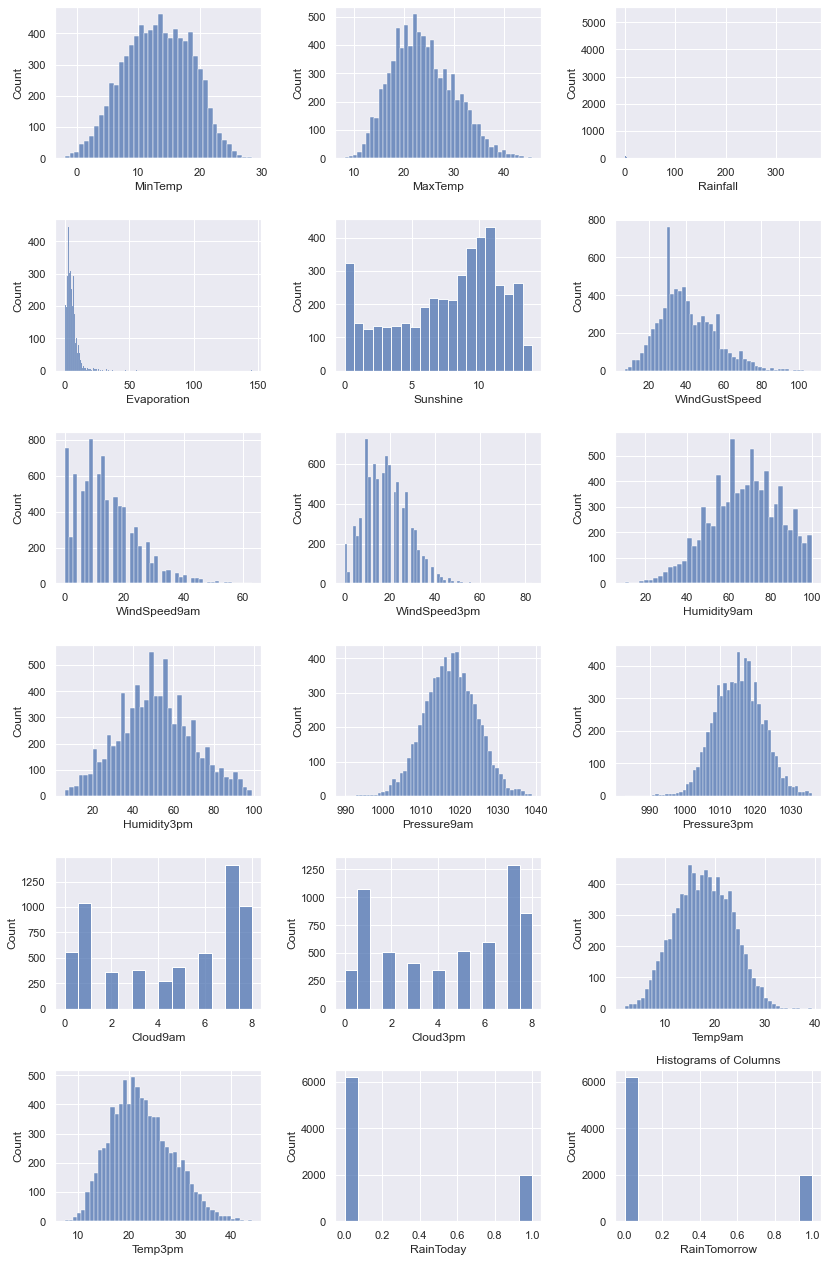

In [14]:
# Histograms

fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(12, 18))
axes = axes.reshape(-1)

continuous = [col for col in df.columns if df[col].dtype != object]
for i, col in enumerate(continuous):
    sns.histplot(df[col], ax=axes[i])

fig.tight_layout(pad=2.0)
plt.title('Histograms of Columns')
plt.savefig('images/histograms.png', facecolor='white', dpi=100);

Observations Done-

Most features are normally distributed as expected
The Rainfall distribution needs further investigation as the large outlier is likely affecting the ability to plot the data
The Sunshine distribution is interesting but largely explainable:
The high frequency of 0 values represents days where it is overcast all day
The abrupt decline in frequency after around 11 hours is a reflection of the limited number of days of the year where it is light out for that many hours or longer
The Humidity9am distribution is particularly interesting due to the large spike in frequencies near 100%

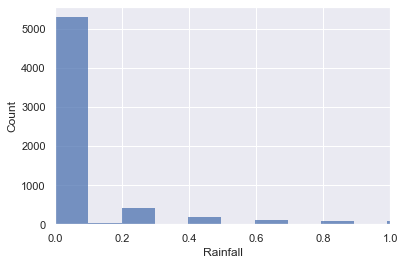

In [15]:
# To show the distribution of values between 0 and 1
sns.histplot(df.Rainfall)
plt.xlim(0, 1);

In [16]:
# Checking rainy days from location
df_rain_by_loc = df.groupby(by='Location').sum()
df_rain_by_loc = df_rain_by_loc[['RainToday']]
df_rain_by_loc.head()

,RainToday
Location,
Adelaide,44.0
Albury,199.0
Brisbane,135.0
CoffsHarbour,187.0
Darwin,33.0


FileNotFoundError: [Errno 2] No such file or directory: 'images/rainy_days_by_loc.png'

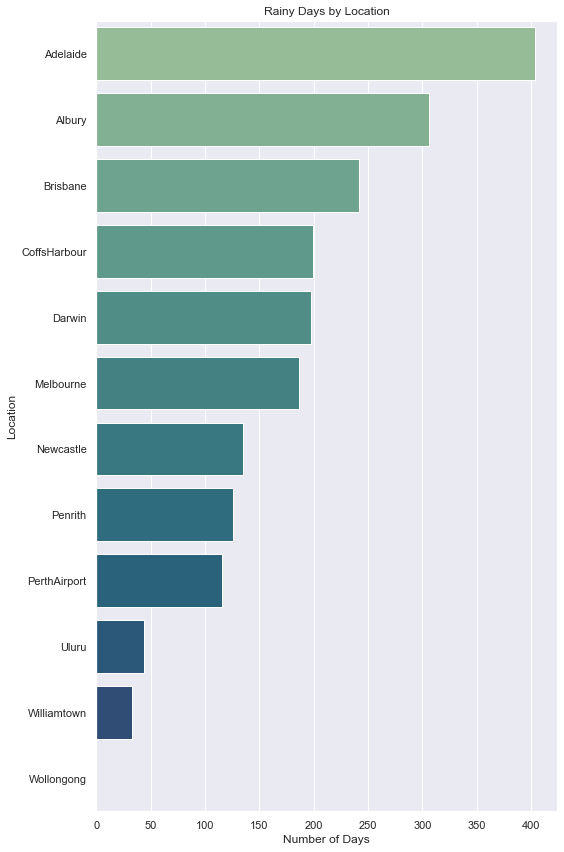

In [17]:
plt.figure(figsize=(8, 12))
sns.barplot(x='RainToday', 
            y=df_rain_by_loc.index, 
            data=df_rain_by_loc.sort_values('RainToday', ascending=False), 
            orient='h',
            palette='crest'
           )
plt.xlabel('Number of Days')
plt.title('Rainy Days by Location')
plt.tight_layout()
plt.savefig('images/rainy_days_by_loc.png', facecolor='white', dpi=100);

In [18]:
df.Location.value_counts()

Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64

In [19]:
# Seasonality
df_seasonality = df.copy()
df_seasonality['month'] = df_seasonality.Date.apply(lambda x: int(str(x)[5:7]))
df_seasonality[['Date', 'month']].head()

,Date,month
0,2008-12-01,12
1,2008-12-02,12
2,2008-12-03,12
3,2008-12-04,12
4,2008-12-05,12


In [20]:
df_seasonality_grouped = df_seasonality.groupby('month').mean()
df_seasonality_grouped[['RainToday']]

,RainToday
month,
1,0.179487
2,0.272120
3,0.243968
4,0.281090
5,0.211514
6,0.292135
7,0.228095
8,0.263079
9,0.240527


FileNotFoundError: [Errno 2] No such file or directory: 'images/seasonality.png'

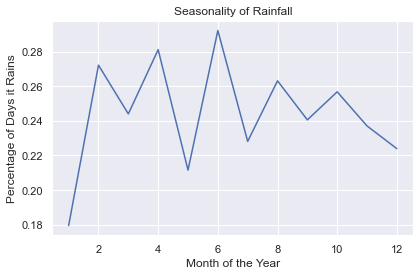

In [21]:
sns.lineplot(data=df_seasonality_grouped, x=df_seasonality_grouped.index, y='RainToday')
plt.title('Seasonality of Rainfall')
plt.xlabel('Month of the Year')
plt.ylabel('Percentage of Days it Rains')
plt.tight_layout()
plt.savefig('images/seasonality.png', facecolor='white', dpi=100);

Rainfall in Australia clearly has a degree of seasonality

# Correlation Matrix

FileNotFoundError: [Errno 2] No such file or directory: 'images/corr_heatmap.png'

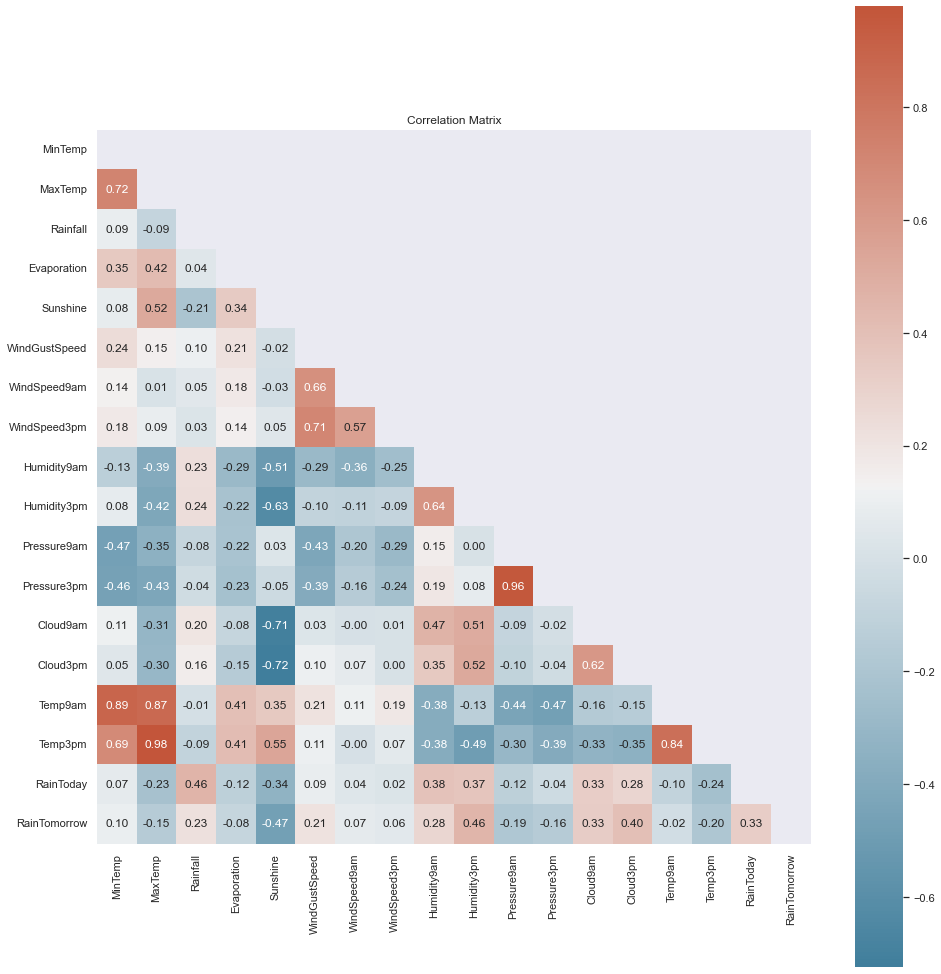

In [22]:
plt.figure(figsize=(14, 14))
plt.title('Correlation Matrix')

# Creating a mask to block the top right half of the heatmap (redundant information)
mask = np.triu(np.ones_like(df.corr()))

# Custom color map
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(df.corr(), mask=mask, annot=True, fmt='.2f', square=True, cmap=cmap)
plt.tight_layout()
plt.savefig('images/corr_heatmap.png', facecolor='white', dpi=100);

In [23]:
# Data Preprocessing

df_imputed = df.dropna(axis=0, subset=['RainTomorrow'])
df_imputed.isna().sum()

Date                0
Location            0
MinTemp            60
MaxTemp            35
Rainfall          107
Evaporation      3419
Sunshine         3880
WindGustDir       953
WindGustSpeed     953
WindDir9am        809
WindDir3pm        286
WindSpeed9am       62
WindSpeed3pm       86
Humidity9am        44
Humidity3pm        83
Pressure9am      1292
Pressure3pm      1293
Cloud9am         2291
Cloud3pm         2331
Temp9am            41
Temp3pm            77
RainToday         107
RainTomorrow        0
dtype: int64

In [24]:
# Continous features
# For this we wil apply IterativeImputer
cont_feats = [col for col in df_imputed.columns if df_imputed[col].dtype != object]
cont_feats.remove('RainTomorrow')
cont_feats

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday']

In [25]:
imputer = IterativeImputer(random_state=42)
df_imputed_cont = imputer.fit_transform(df_imputed[cont_feats])
df_imputed_cont = pd.DataFrame(df_imputed_cont, columns=cont_feats)
df_imputed_cont.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,13.4,22.9,0.6,5.462407,6.498250,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,5.118398,16.9,21.8,0.0
1,7.4,25.1,0.0,5.932122,12.420220,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,1.023826,1.617162,17.2,24.3,0.0
2,12.9,25.7,0.0,7.357765,11.759469,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,2.121845,2.000000,21.0,23.2,0.0
3,9.2,28.0,0.0,5.323681,12.875563,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,0.446574,1.046166,18.1,26.5,0.0
4,17.5,32.3,1.0,5.458007,6.284260,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0.0


In [26]:
df_imputed_cont.isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
dtype: int64

In [27]:
# Categorical features
cat_feats = [col for col in df_imputed.columns if col not in cont_feats]
cat_feats.remove('RainTomorrow')

# Also removing Date and Location since no values are missing
cat_feats.remove('Date')
cat_feats.remove('Location')
cat_feats

['WindGustDir', 'WindDir9am', 'WindDir3pm']

In [28]:
df_imputed_cat = df_imputed[cat_feats]

for col in df_imputed_cat.columns:
    values = df_imputed_cat.WindDir3pm.value_counts().reset_index()['index'].values
    probs = df_imputed_cat[col].value_counts(normalize=True).values
    df_imputed_cat[col].replace(np.nan, np.random.choice(a=values, p=probs), inplace=True)

df_imputed_cat.head()

,WindGustDir,WindDir9am,WindDir3pm
0,W,W,WNW
1,WNW,NNW,WSW
2,WSW,W,WSW
3,NE,SE,E
4,W,ENE,NW


In [29]:
df_imputed_cat.isna().sum()

WindGustDir    0
WindDir9am     0
WindDir3pm     0
dtype: int64

# Concatenating

In [30]:
# Placing separated dataframes back together into one final dataframe.

df_date_loc = df_imputed[['Date', 'Location']]
df_target = df_imputed.RainTomorrow

print(df_date_loc.shape)
print(df_imputed_cont.shape)
print(df_imputed_cat.shape)
print(df_target.shape)

(8186, 2)
(8186, 17)
(8186, 3)
(8186,)


In [31]:
df_imputed_final = pd.concat(objs=[df_date_loc.reset_index(drop=True), 
                                   df_imputed_cont.reset_index(drop=True), 
                                   df_imputed_cat.reset_index(drop=True), 
                                   df_target.reset_index(drop=True)
                                  ], 
                             axis=1
                            )
df_imputed_final.shape

(8186, 23)

In [32]:
df_imputed_final.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,WindGustDir,WindDir9am,WindDir3pm,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,5.462407,6.498250,44.0,20.0,24.0,...,1007.1,8.000000,5.118398,16.9,21.8,0.0,W,W,WNW,0.0
1,2008-12-02,Albury,7.4,25.1,0.0,5.932122,12.420220,44.0,4.0,22.0,...,1007.8,1.023826,1.617162,17.2,24.3,0.0,WNW,NNW,WSW,0.0
2,2008-12-03,Albury,12.9,25.7,0.0,7.357765,11.759469,46.0,19.0,26.0,...,1008.7,2.121845,2.000000,21.0,23.2,0.0,WSW,W,WSW,0.0
3,2008-12-04,Albury,9.2,28.0,0.0,5.323681,12.875563,24.0,11.0,9.0,...,1012.8,0.446574,1.046166,18.1,26.5,0.0,NE,SE,E,0.0
4,2008-12-05,Albury,17.5,32.3,1.0,5.458007,6.284260,41.0,7.0,20.0,...,1006.0,7.000000,8.000000,17.8,29.7,0.0,W,ENE,NW,0.0


In [33]:
# Checking if all the missing values handled
df_imputed_final.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
WindGustDir      0
WindDir9am       0
WindDir3pm       0
RainTomorrow     0
dtype: int64

In [34]:
# Extracting the month
df_month = df_imputed_final.copy()
df_month.insert(1, 'Month', df_month.Date.apply(lambda x: int(str(x)[5:7])))
df_month.drop(columns='Date', inplace=True)
df_month.head()

,Month,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,WindGustDir,WindDir9am,WindDir3pm,RainTomorrow
0,12,Albury,13.4,22.9,0.6,5.462407,6.498250,44.0,20.0,24.0,...,1007.1,8.000000,5.118398,16.9,21.8,0.0,W,W,WNW,0.0
1,12,Albury,7.4,25.1,0.0,5.932122,12.420220,44.0,4.0,22.0,...,1007.8,1.023826,1.617162,17.2,24.3,0.0,WNW,NNW,WSW,0.0
2,12,Albury,12.9,25.7,0.0,7.357765,11.759469,46.0,19.0,26.0,...,1008.7,2.121845,2.000000,21.0,23.2,0.0,WSW,W,WSW,0.0
3,12,Albury,9.2,28.0,0.0,5.323681,12.875563,24.0,11.0,9.0,...,1012.8,0.446574,1.046166,18.1,26.5,0.0,NE,SE,E,0.0
4,12,Albury,17.5,32.3,1.0,5.458007,6.284260,41.0,7.0,20.0,...,1006.0,7.000000,8.000000,17.8,29.7,0.0,W,ENE,NW,0.0


In [35]:
# Dummy Variables
categoricals = ['Month', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']
df_dummies = pd.get_dummies(df_month, columns=categoricals)
df_dummies.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,13.4,22.9,0.6,5.462407,6.498250,44.0,20.0,24.0,71.0,22.0,...,0,0,0,0,0,0,0,0,1,0
1,7.4,25.1,0.0,5.932122,12.420220,44.0,4.0,22.0,44.0,25.0,...,0,0,0,0,0,0,0,0,0,1
2,12.9,25.7,0.0,7.357765,11.759469,46.0,19.0,26.0,38.0,30.0,...,0,0,0,0,0,0,0,0,0,1
3,9.2,28.0,0.0,5.323681,12.875563,24.0,11.0,9.0,45.0,16.0,...,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,5.458007,6.284260,41.0,7.0,20.0,82.0,33.0,...,0,1,0,0,0,0,0,0,0,0


In [36]:
df_dummies.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow', 'Month_1', 'Month_2',
       'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7', 'Month_8',
       'Month_9', 'Month_10', 'Month_11', 'Month_12', 'Location_Adelaide',
       'Location_Albury', 'Location_Brisbane', 'Location_CoffsHarbour',
       'Location_Darwin', 'Location_Melbourne', 'Location_Newcastle',
       'Location_Penrith', 'Location_PerthAirport', 'Location_Uluru',
       'Location_Williamtown', 'Location_Wollongong', 'WindGustDir_E',
       'WindGustDir_ENE', 'WindGustDir_ESE', 'WindGustDir_N', 'WindGustDir_NE',
       'WindGustDir_NNE', 'WindGustDir_NNW', 'WindGustDir_NW', 'WindGustDir_S',
       'WindGustDir_SE', 'WindGustDir_SSE', 'WindGustDir_SSW',
       'WindGustDir_SW', 'WindGustDir_W', 'WindGust

# Modeling

In [37]:
df_final = df_dummies.copy()
X = df_final.drop(columns='RainTomorrow')
y = df_final.RainTomorrow

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

print('Train size:', X_train.shape[0])
print('Test size: ', X_test.shape[0])

Train size: 6139
Test size:  2047


In [38]:
# Logistic Regression
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred

array([0., 1., 1., ..., 0., 0., 0.])

Confusion Matrix
-----------------------------------------------------


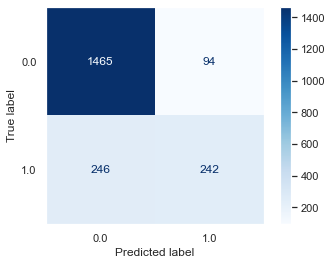



Classification Report
-----------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90      1559
         1.0       0.72      0.50      0.59       488

    accuracy                           0.83      2047
   macro avg       0.79      0.72      0.74      2047
weighted avg       0.82      0.83      0.82      2047



ROC Curve
-----------------------------------------------------


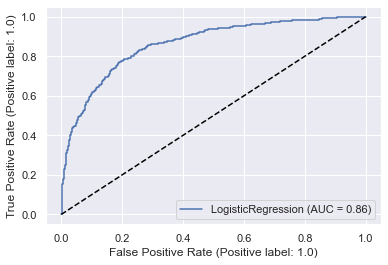



Checking model fitness
-----------------------------------------------------
Train score: 0.833
Test score:  0.8339




In [39]:
def conf_matrix(model, X_test, y_test, cmap='Blues'):
    plot_confusion_matrix(model, X_test, y_test, cmap=cmap)
    plt.grid()
    plt.show()

def roc_curve_custom(model, X_test, y_test):
    plot_roc_curve(model, X_test, y_test)
    plt.plot([0, 1], [0, 1], color='black', linestyle='--')
    plt.show()
    
def evaluate(model, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test, y_pred=y_pred):
    # Confusion Matrix
    print('Confusion Matrix')
    print('-'*53)
    conf_matrix(model, X_test, y_test)
    print('\n') 
    
    # Classification Report
    print('Classification Report') 
    print('-'*53)
    print(classification_report(y_test, y_pred))
    print('\n')
    
    # ROC Curve
    print('ROC Curve')
    print('-'*53)
    roc_curve_custom(model, X_test, y_test)
    print('\n')
    
    # Checking model fitness
    print('Checking model fitness') 
    print('-'*53)
    print('Train score:', round(model.score(X_train, y_train), 4))
    print('Test score: ', round(model.score(X_test, y_test), 4))
    print('\n')
    
evaluate(logreg)

Observations-

Decent performance for a baseline model
Recall is the weakest point, particularly for days where it does rain tomorrow
The model is well fit, with both the train and test scores approximately the same

In [40]:
# Correcting class imbalance

X_train_resampled, y_train_resampled = SMOTE().fit_resample(X_train, y_train)

print('Original')
print('-'*20)
print(y_train.value_counts())
print('\n')
print('SMOTE')
print('-'*20)
print(pd.Series(y_train_resampled).value_counts())

Original
--------------------
0.0    4636
1.0    1503
Name: RainTomorrow, dtype: int64


SMOTE
--------------------
0.0    4636
1.0    4636
Name: RainTomorrow, dtype: int64


In [41]:
logreg_smote = LogisticRegression(random_state=42)
logreg_smote.fit(X_train_resampled, y_train_resampled)
y_pred_smote = logreg_smote.predict(X_test)
y_pred_smote

array([0., 1., 1., ..., 0., 0., 0.])

Confusion Matrix
-----------------------------------------------------


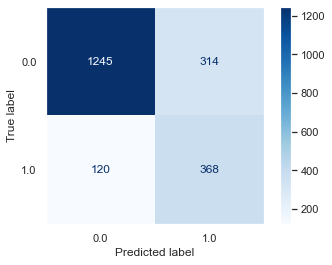



Classification Report
-----------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.91      0.80      0.85      1559
         1.0       0.54      0.75      0.63       488

    accuracy                           0.79      2047
   macro avg       0.73      0.78      0.74      2047
weighted avg       0.82      0.79      0.80      2047



ROC Curve
-----------------------------------------------------


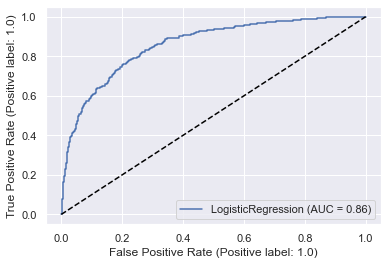



Checking model fitness
-----------------------------------------------------
Train score: 0.7764
Test score:  0.788




In [42]:
evaluate(logreg_smote, X_train=X_train_resampled, y_train=y_train_resampled, y_pred=y_pred_smote)

Observations-

Despite a slight increase in the positive F1 score, the accuracy of this model sharply decreased
This model remains well fit but scores for both the train and test sets decreased
Contrary to my initial thoughts, using SMOTE actually had worse performance and will not be utilized in subsequent iterations

# Hyperparameter Tunning

In [43]:
logreg_params = {
    'C': [1, 1e8, 1e16],
    'fit_intercept': [True, False],
    'max_iter': [50, 100, 150],
    'random_state': [42]
}

logreg_gs = GridSearchCV(logreg, logreg_params, scoring='accuracy', cv=3)
logreg_gs.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [1, 100000000.0, 1e+16],
                         'fit_intercept': [True, False],
                         'max_iter': [50, 100, 150], 'random_state': [42]},
             scoring='accuracy')

-Due to the amount of time it takes to run the grid search, I'll be using the joblib library to save it to a file for easy access without rerunning the entire training process again.

In [46]:
logreg_gs.best_params_

{'C': 1, 'fit_intercept': True, 'max_iter': 150, 'random_state': 42}

In [47]:
round(logreg_gs.best_score_, 4)

0.8342

In [48]:
y_pred_logreg_gs = logreg_gs.predict(X_test)
y_pred_logreg_gs

array([0., 1., 1., ..., 0., 0., 0.])

Confusion Matrix
-----------------------------------------------------


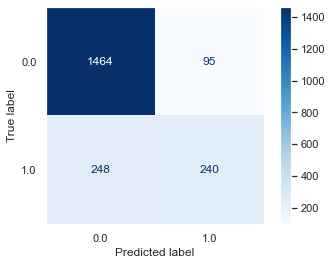



Classification Report
-----------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90      1559
         1.0       0.72      0.49      0.58       488

    accuracy                           0.83      2047
   macro avg       0.79      0.72      0.74      2047
weighted avg       0.82      0.83      0.82      2047



ROC Curve
-----------------------------------------------------


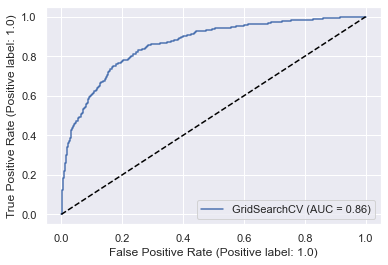



Checking model fitness
-----------------------------------------------------
Train score: 0.8316
Test score:  0.8324




In [49]:
evaluate(logreg_gs, y_pred=y_pred_logreg_gs)

Observations-

-Slight improvements in precision and model fitness
-Overall, not much improvement over the baseline logreg model

In [50]:
# Decision Tree
# Baseline
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred_tree = clf.predict(X_test)
y_pred_tree

array([1., 0., 1., ..., 1., 0., 0.])

Confusion Matrix
-----------------------------------------------------


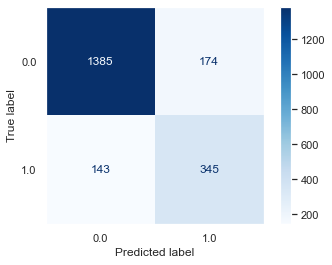



Classification Report
-----------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.91      0.89      0.90      1559
         1.0       0.66      0.71      0.69       488

    accuracy                           0.85      2047
   macro avg       0.79      0.80      0.79      2047
weighted avg       0.85      0.85      0.85      2047



ROC Curve
-----------------------------------------------------


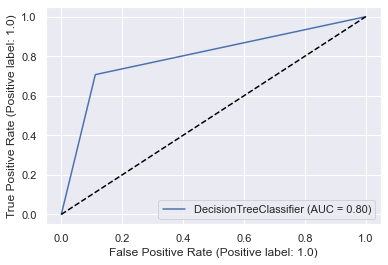



Checking model fitness
-----------------------------------------------------
Train score: 1.0
Test score:  0.8451




In [51]:
evaluate(clf, y_pred=y_pred_tree)

Observations-

.The accuracy is lower than the tuned logisitic regression model
.The model is overfit, given by the much higher score for the train data versus the test data

In [53]:
# Hyperparameter Tunning
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 7, 11],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'random_state': [42]
}

clf_gs = GridSearchCV(clf, param_grid=params, scoring='accuracy', cv=3)
clf_gs.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 7, 11], 'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 5, 10],
                         'random_state': [42]},
             scoring='accuracy')

In [56]:
clf_gs.best_params_

{'criterion': 'entropy',
 'max_depth': 11,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'random_state': 42}

In [57]:
round(clf_gs.best_score_, 4)

0.8239

In [58]:
y_pred_tree_gs = clf_gs.best_estimator_.predict(X_test)
y_pred_tree_gs

array([0., 0., 1., ..., 1., 0., 0.])

Confusion Matrix
-----------------------------------------------------


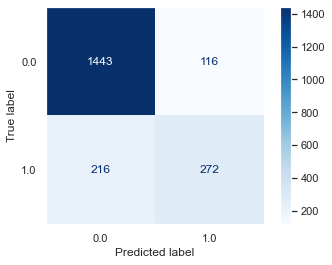



Classification Report
-----------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.87      0.93      0.90      1559
         1.0       0.70      0.56      0.62       488

    accuracy                           0.84      2047
   macro avg       0.79      0.74      0.76      2047
weighted avg       0.83      0.84      0.83      2047



ROC Curve
-----------------------------------------------------


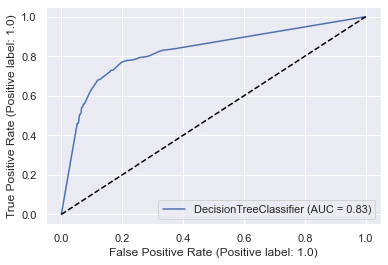



Checking model fitness
-----------------------------------------------------
Train score: 0.9267
Test score:  0.8378




In [59]:
evaluate(clf_gs.best_estimator_, y_pred=y_pred_tree_gs)

In [60]:
# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_pred_rf


array([1., 0., 1., ..., 1., 0., 0.])

Confusion Matrix
-----------------------------------------------------


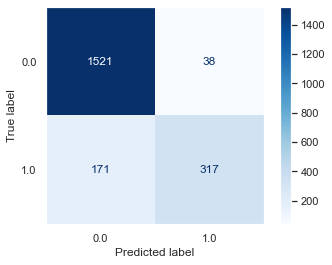



Classification Report
-----------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.90      0.98      0.94      1559
         1.0       0.89      0.65      0.75       488

    accuracy                           0.90      2047
   macro avg       0.90      0.81      0.84      2047
weighted avg       0.90      0.90      0.89      2047



ROC Curve
-----------------------------------------------------


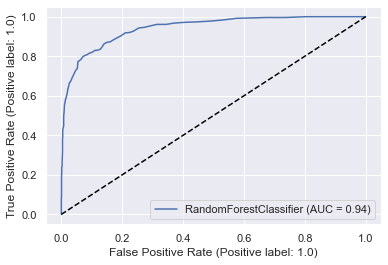



Checking model fitness
-----------------------------------------------------
Train score: 1.0
Test score:  0.8979




In [61]:
evaluate(rf, y_pred=y_pred_rf)

Observations-

Good scores on the evaluation metrics
The model is a bit overfit

In [63]:
# Hyperparameter Tunning
rf_params = {
    'n_estimators': [10, 35, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 7, 11],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'random_state': [42]
}

rf_gs = GridSearchCV(rf, param_grid=rf_params, scoring='accuracy', cv=3)
rf_gs.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 7, 11], 'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 35, 100], 'random_state': [42]},
             scoring='accuracy')

In [66]:
rf_gs.best_params_

{'criterion': 'gini',
 'max_depth': 11,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100,
 'random_state': 42}

In [68]:
round(rf_gs.best_score_, 4)

0.8536

In [69]:
y_pred_rf_gs = rf_gs.predict(X_test)
y_pred_rf_gs

array([0., 0., 1., ..., 0., 0., 0.])

Confusion Matrix
-----------------------------------------------------


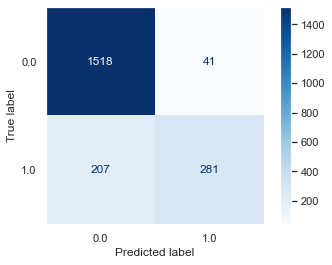



Classification Report
-----------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92      1559
         1.0       0.87      0.58      0.69       488

    accuracy                           0.88      2047
   macro avg       0.88      0.77      0.81      2047
weighted avg       0.88      0.88      0.87      2047



ROC Curve
-----------------------------------------------------


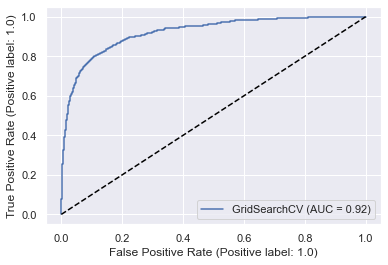



Checking model fitness
-----------------------------------------------------
Train score: 0.934
Test score:  0.8788




In [70]:
evaluate(rf_gs, y_pred=y_pred_rf_gs)

In [71]:
# XGBoost
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
y_pred_xgb

[02:31:00] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


array([1., 0., 1., ..., 1., 0., 0.])

Confusion Matrix
-----------------------------------------------------


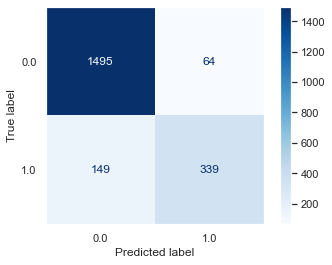



Classification Report
-----------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.91      0.96      0.93      1559
         1.0       0.84      0.69      0.76       488

    accuracy                           0.90      2047
   macro avg       0.88      0.83      0.85      2047
weighted avg       0.89      0.90      0.89      2047



ROC Curve
-----------------------------------------------------


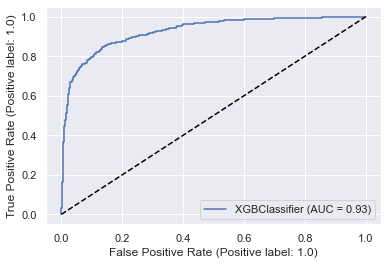



Checking model fitness
-----------------------------------------------------
Train score: 0.9985
Test score:  0.8959




In [72]:
evaluate(xgb, y_pred=y_pred_xgb)

In [73]:
# XGBoost
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
y_pred_xgb

[02:31:31] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


array([1., 0., 1., ..., 1., 0., 0.])

Confusion Matrix
-----------------------------------------------------


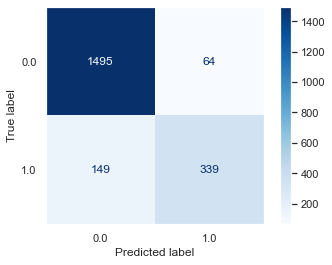



Classification Report
-----------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.91      0.96      0.93      1559
         1.0       0.84      0.69      0.76       488

    accuracy                           0.90      2047
   macro avg       0.88      0.83      0.85      2047
weighted avg       0.89      0.90      0.89      2047



ROC Curve
-----------------------------------------------------


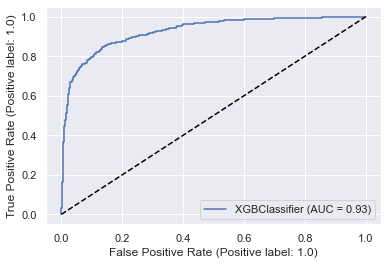



Checking model fitness
-----------------------------------------------------
Train score: 0.9985
Test score:  0.8959




In [74]:
evaluate(xgb, y_pred=y_pred_xgb)

Observations-
Highest accuracy score yet
Highest AUC yet
The model is decently fit

In [76]:
# Hyperparameter Tunning
xgb_params = {
    'n_estimators': [10, 35, 100],
    'max_depth': [5, 10, 15],
    'learning_rate': [0.01, 0.1, 0.25]
}

xgb_gs = GridSearchCV(xgb, xgb_params, scoring='accuracy', cv=3)
xgb_gs.fit(X_train, y_train)

[02:33:02] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:33:02] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:33:03] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:33:03] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1,
                                     enable_categorical=False, gamma=0,
                                     gpu_id=-1, importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=4,
                                     num_parallel_tree=1, predictor='auto',
                                     random_state=42, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
          

In [79]:
xgb_gs.best_params_

{'learning_rate': 0.25, 'max_depth': 10, 'n_estimators': 35}

In [80]:
round(xgb_gs.best_score_, 4)

0.8681

In [81]:
y_pred_xgb_gs = xgb_gs.predict(X_test)
y_pred_xgb_gs

array([0., 0., 1., ..., 1., 0., 0.])

Confusion Matrix
-----------------------------------------------------


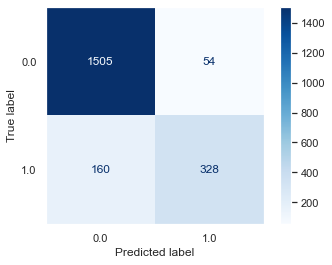



Classification Report
-----------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.90      0.97      0.93      1559
         1.0       0.86      0.67      0.75       488

    accuracy                           0.90      2047
   macro avg       0.88      0.82      0.84      2047
weighted avg       0.89      0.90      0.89      2047



ROC Curve
-----------------------------------------------------


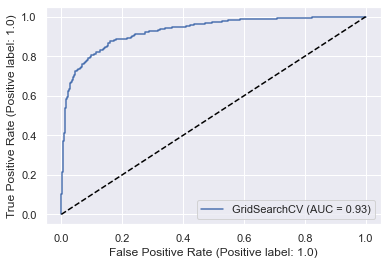



Checking model fitness
-----------------------------------------------------
Train score: 0.9985
Test score:  0.8955




In [82]:
evaluate(xgb_gs, y_pred=y_pred_xgb_gs)

Observations made-
Slight improvement in some metrics but largely the same
AUC remains the same
Model fitness slightly decreased
Overall, not much of an impact

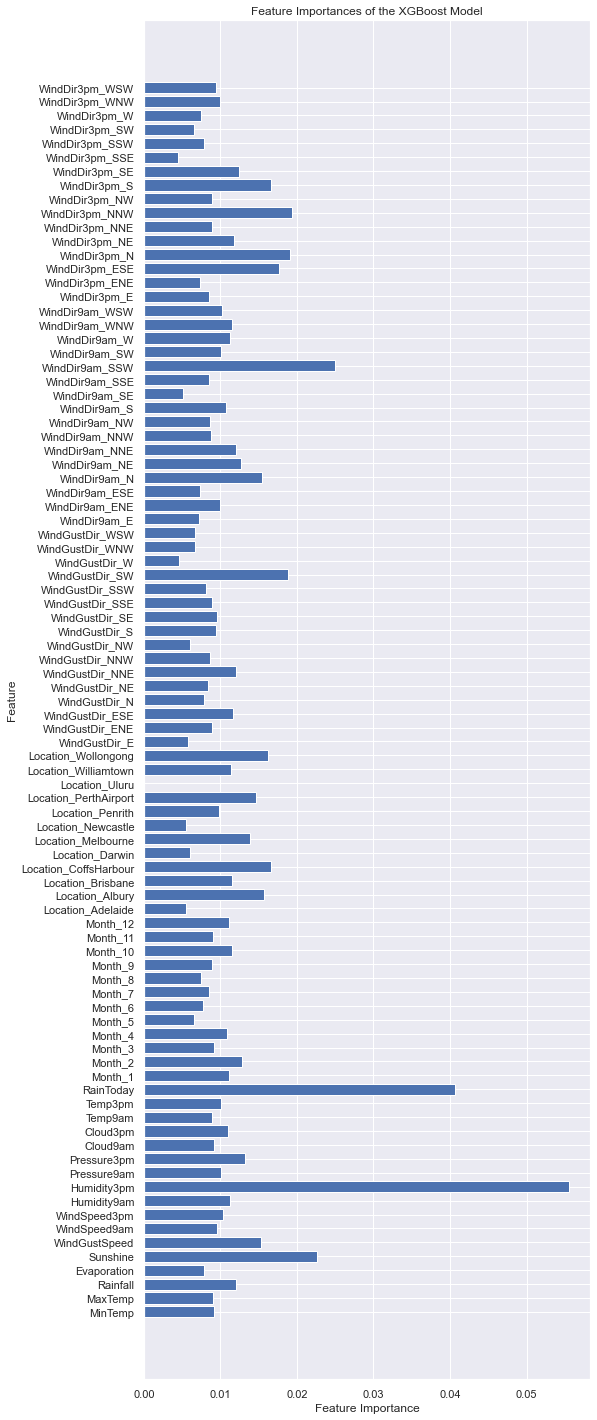

In [84]:
# Feature Importances
best_xgb = xgb_gs.best_estimator_

plt.figure(figsize=(8, 25))
plt.barh(range(best_xgb.n_features_in_), best_xgb.feature_importances_)
plt.yticks(np.arange(best_xgb.n_features_in_), X_train.columns.values)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances of the XGBoost Model');

Although the dummy variables were necessary for modeling the data, they are not conducive to analyzing the feature importances. As a result, we need to regroup the data into their primary categories to aggregate their category-level importances.

In [85]:
feat_imp_df = pd.DataFrame(data={'Feature': df_final.columns.drop('RainTomorrow'),
                                 'Importance': best_xgb.feature_importances_
                                }
                           )
feat_imp_df['Group'] = feat_imp_df.Feature.apply(lambda x: x.split('_')[0])
feat_imp_df

,Feature,Importance,Group
0,MinTemp,0.009090,MinTemp
1,MaxTemp,0.009075,MaxTemp
2,Rainfall,0.012055,Rainfall
3,Evaporation,0.007913,Evaporation
4,Sunshine,0.022616,Sunshine
...,...,...,...
84,WindDir3pm_SSW,0.007785,WindDir3pm
85,WindDir3pm_SW,0.006583,WindDir3pm
86,WindDir3pm_W,0.007508,WindDir3pm
87,WindDir3pm_WNW,0.009892,WindDir3pm


In [86]:
feat_imp_df.Group.value_counts()

WindDir3pm       16
WindDir9am       16
WindGustDir      16
Location         12
Month            12
MaxTemp           1
RainToday         1
Temp3pm           1
Temp9am           1
Cloud3pm          1
Cloud9am          1
MinTemp           1
Pressure9am       1
Humidity3pm       1
Humidity9am       1
WindSpeed3pm      1
WindSpeed9am      1
WindGustSpeed     1
Sunshine          1
Evaporation       1
Rainfall          1
Pressure3pm       1
Name: Group, dtype: int64

As we can see these value counts align with the number of unique values for the categorical columns in the original dataframe (excluding Month which was engineered later), meaning the lambda function worked as expected.

In [87]:
feat_imp_df_grouped = feat_imp_df.groupby(by='Group').sum()
feat_imp_df_grouped.sort_values('Importance', ascending=False, inplace=True)
feat_imp_df_grouped

,Importance
Group,
WindDir3pm,0.176095
WindDir9am,0.174359
WindGustDir,0.142279
Location,0.126714
Month,0.114691
Humidity3pm,0.055564
RainToday,0.040647
Sunshine,0.022616
WindGustSpeed,0.015350


FileNotFoundError: [Errno 2] No such file or directory: 'images/feat_importances.png'

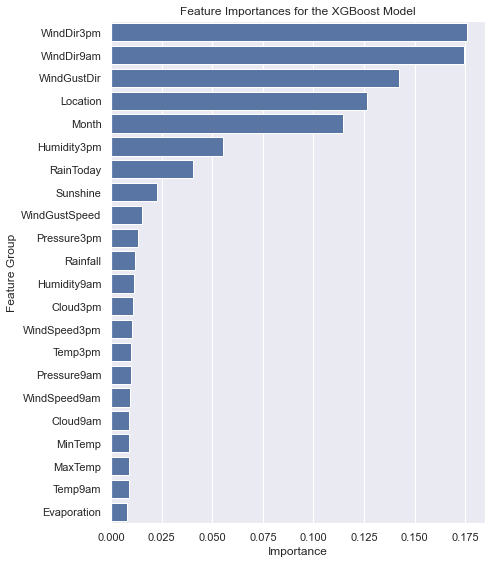

In [88]:
# Plotting
plt.figure(figsize=(7, 8))
sns.barplot(y=feat_imp_df_grouped.index,
            x=feat_imp_df_grouped.Importance,
            orient='h',
            color=sns.color_palette()[0]
           )
plt.title('Feature Importances for the XGBoost Model')
plt.ylabel('Feature Group')
plt.xlabel('Importance')
plt.tight_layout()
plt.savefig('images/feat_importances.png', facecolor='white', dpi=100);

# Model comparisons

FileNotFoundError: [Errno 2] No such file or directory: 'images/model_accuracies.png'

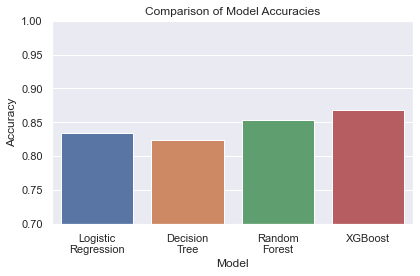

In [89]:
# Comparisons
models = [logreg_gs, clf_gs, rf_gs, xgb_gs]

sns.barplot(x=['Logistic\nRegression', 'Decision\nTree', 'Random\nForest', 'XGBoost'],
            y=[model.best_score_ for model in models]
           )
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0.7, 1.0)
plt.title('Comparison of Model Accuracies')
plt.tight_layout()
plt.savefig('images/model_accuracies.png', facecolor='white', dpi=100);

FileNotFoundError: [Errno 2] No such file or directory: 'images/model_roc_curves.png'

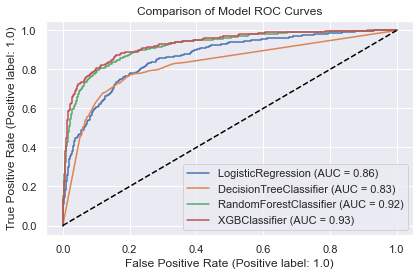

In [90]:
fig, ax = plt.subplots()
for model in models:
    plot_roc_curve(model, 
                   X_test, 
                   y_test,
                   name=type(model.best_estimator_).__name__,
                   ax=ax
                  )
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.title('Comparison of Model ROC Curves')
plt.tight_layout()
plt.savefig('images/model_roc_curves.png', facecolor='white', dpi=100);


# Conclusion

Results-

The best performing model is the hyperparameter-tuned XGBoost model with an accuracy of approximately 86%. The scores for both the training and testing data were similar, reducing concerns of the model being overfit. In terms of feature importances, Humidity3pm is the single most important feature.